# Loading Packages

In [ ]:
# Packages for EDA
import pandas as pd
import numpy as np

#Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, precision_score, accuracy_score, f1_score,recall_score

#Removing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [ ]:
#Loading the Database into Colab
df = pd.read_csv('Training Data.csv')

#5 first lines of the database
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#Analyzing the variables of the Database / No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


The variables are in the proper data types.
'id', 'CITY', 'STATE', 'CURRENT_HOUSE_YRS' and 'Profession' will be dropped as it do not significantly contribute to customers behaviours on consumer loans.

In [ ]:
df = df.drop(columns=['Id', 'CITY', 'STATE', 'Profession', 'CURRENT_HOUSE_YRS'])

In [ ]:
#Numerical descriptive information
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,1.000000


No signals of outliers in the dataset

In [ ]:
#Categorical descriptive information
df.describe(include='object')

,Married/Single,House_Ownership,Car_Ownership
count,252000,252000,252000
unique,2,3,2
top,single,rented,no
freq,226272,231898,176000


# Exploratory Data Analysis

First we need to check if there are missing or duplicate values as they will negatively impact the KMeans algorithm

In [ ]:
#Number of Null values in each column of the Dataset:
df.isnull().sum()

Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
CURRENT_JOB_YRS    0
Risk_Flag          0
dtype: int64

In [ ]:
#Number of duplicated lines:
df.duplicated().sum()

208810

There are many duplicates found in the dataset

In [ ]:
#Remove the duplicated:
df.drop_duplicates(inplace=True)

#Reset index:
df.reset_index(inplace = True,drop = True)

The KMeans need numeric values for clustering. We have to convert the categorical columns to dummies variables.

In [ ]:
# Encoding 'House_Ownership'
df1 = df.copy()
df1['House_Ownership'] = df1['House_Ownership'].astype('category')
df1['House_Ownership'] = df1['House_Ownership'].cat.codes #2:rented, 1:owned, 0:norent_noown

# Encoding 'Married/Single' and 'Car_Ownership'
df1 = pd.get_dummies(df, drop_first = True, columns = ['House_Ownership','Car_Ownership', 'Married/Single'])

df1 = df1.drop(columns = 'Risk_Flag', axis = 1)

In [ ]:
df1

,Income,Age,Experience,CURRENT_JOB_YRS,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Married/Single_single
0,1303834,23,3,3,False,True,False,True
1,7574516,40,10,9,False,True,False,True
2,3991815,66,4,4,False,True,False,False
3,6256451,41,2,2,False,True,True,True
4,5768871,47,11,3,False,True,False,True
...,...,...,...,...,...,...,...,...
43185,8154883,43,13,6,False,True,False,True
43186,2843572,26,10,6,False,True,False,True
43187,4522448,46,7,7,False,True,False,True
43188,6507128,45,0,0,False,True,False,True


Because K-means uses distance between observations as its measure of similarity, it’s important to scale the data before modeling.

The code 'StandardScaler().fit_transform(df1)' standardizes the data in DataFrame df1, ensuring that each feature has a mean of zero and a standard deviation of one.

In [ ]:
# Standard scaling(normalization)
df1 = StandardScaler().fit_transform(df1)

# KMeans modelling¶
The first step in KMeans modelling is to find out the most appropriate number of clusters by evaluating the inertia and silhouette score.

Inertia, also known as within-cluster sum of squares, is a measure of how compact clusters are in a KMeans model. The lower the inertia, the more compact and well-defined the clusters are.

The silhouette score is a measure of the separation and cohesion of clusters. It ranges from -1 to 1, where values closer to 1 indicate well-defined and distinct clusters, while values closer to -1 indicate poorly defined and overlapping clusters.

In [ ]:
# Fitting K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2,16)]
def kmeans_inertia(num_clusters, x_values):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters = num, random_state = 123) #Seed = 123 for replication of the results
        kms.fit(x_values)
        inertia.append(kms.inertia_)
    return inertia
inertia = kmeans_inertia(num_clusters, df1)
inertia

[275573.5809677412,
 227315.9264561375,
 191104.07703743107,
 166988.88716279546,
 154112.43129080618,
 142141.08562585496,
 133571.1791057489,
 121456.68726701403,
 115354.06776078025,
 110216.17251018708,
 105710.48162004986,
 101358.34914402802,
 97787.28607981226,
 93461.05791869886]

Text(0, 0.5, 'Inertia')

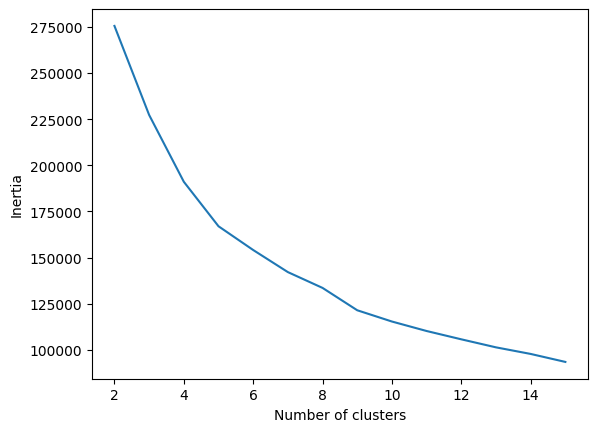

In [ ]:
# Creating a line plot to determine the most appropriate number of clusters
sns.lineplot(x = num_clusters, y = inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The inertia dropeed damatically when the number of clusters increases from 2 to 5. however after that, the difference is much less

In [ ]:
# Fitting K-means and evaluate silhouette score for different values of k.
num_clusters = [i for i in range(2,16)]
def kmeans_sil(num_clusters,x_values):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters = num, random_state = 123)
        kms.fit(x_values)
        sil_score.append(silhouette_score(x_values,kms.labels_))
    return sil_score
sil_score = kmeans_sil(num_clusters,df1)
sil_score

[0.44644624046671705,
 0.19953400194205573,
 0.2291087468984776,
 0.23998943974319784,
 0.21330831995654156,
 0.2272468786256375,
 0.2202169464506556,
 0.2293749886772133,
 0.22207441692124064,
 0.2285093734759168,
 0.22613748544877157,
 0.23377033581803716,
 0.23665247287998323,
 0.2281460644051829]

Text(0, 0.5, 'Silhouette score')

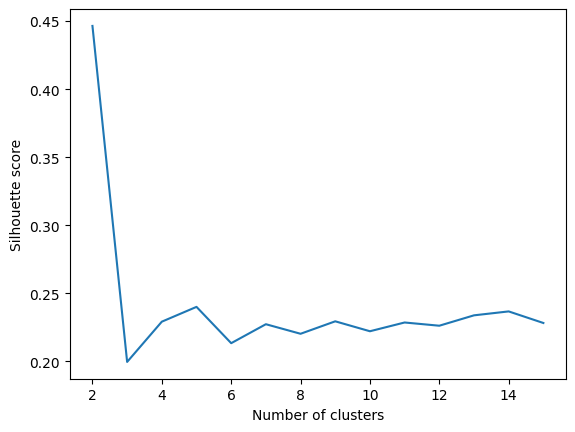

In [ ]:
# Creating a line plot to determine the most appropriate number of clusters
sns.lineplot(x = num_clusters, y = sil_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters.¶
The plot indicates that the silhouette score drop dramatically from 2 to 3 cluster, then gradually increases when the data is partitioned into six clusters. Therefore, 5 clusters yield a relatively good silhouette scor. We thus choose 5 as the optimal number of clusters to build KMeans model.

In [ ]:
# Fitting a 5-cluster model
kmeans6 = KMeans(n_clusters = 5, random_state = 123)
kmeans6.fit(df1)

KMeans(n_clusters=5, random_state=123)

In [ ]:
# Printing unique labels
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4]


In [ ]:
# Creating a new column `cluster`.
df['Cluster'] = kmeans6.labels_


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,Risk_Flag,Cluster
0,1303834,23,3,single,rented,no,3,0,1
1,7574516,40,10,single,rented,no,9,0,4
2,3991815,66,4,married,rented,no,4,0,0
3,6256451,41,2,single,rented,yes,2,1,1
4,5768871,47,11,single,rented,no,3,1,1
...,...,...,...,...,...,...,...,...,...
43185,8154883,43,13,single,rented,no,6,0,4
43186,2843572,26,10,single,rented,no,6,0,4
43187,4522448,46,7,single,rented,no,7,0,4
43188,6507128,45,0,single,rented,no,0,0,1


In [ ]:
kmeans6.inertia_

166988.88716279546

In [ ]:
# Verify if any `cluster` can be differentiated by `Risk_Flag`.
df.groupby(['Cluster','Risk_Flag']).size()

Cluster  Risk_Flag
0        0             3328
         1              810
1        0             9818
         1             2414
2        0             7031
         1             1754
3        0             1794
         1              450
4        0            12776
         1             3015
dtype: int64

As we see, all of the customers in cluster 0 defaulted on their loan, while customers in clusters 1,2 and 4 did not default. On the other hand, just a small portion of customers grouped in cluster 3 and 5 defaulted.¶
The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about customers behaviour and default.